In [12]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
sns.set()
sns.set_style("whitegrid")


In [3]:
from scipy.optimize import curve_fit

In [4]:
N = [10 , 30  , 100 , 300 , 1000]
time = [0.0003862900000000001 , 0.00072871000000000003 , 0.0041199699999999997 , 0.043050020000000001 , 0.7143264800000001 ]
errors = [8.8775367642156237e-05 , 0.00014334736098024268 , 0.0005553740083043137 , 0.0043235672354665659 , 0.041468918159141797]

In [5]:
def quadratic(x ,a ,b , c):
    return a*x**2 + b*x+ c

param , popt = curve_fit(quadratic , N , time)
print(param)
print(np.sqrt(np.diag(popt)))

[  8.20274654e-07  -1.09458179e-04   3.42177060e-03]
[  1.74415478e-08   1.84238695e-05   2.17147215e-03]


In [6]:
residuals = np.zeros(len(N))
for i in range(len(N)):
    residuals[i] = time[i] - quadratic(N[i], *param)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((time-np.mean(time))**2)

r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

0.999955001901


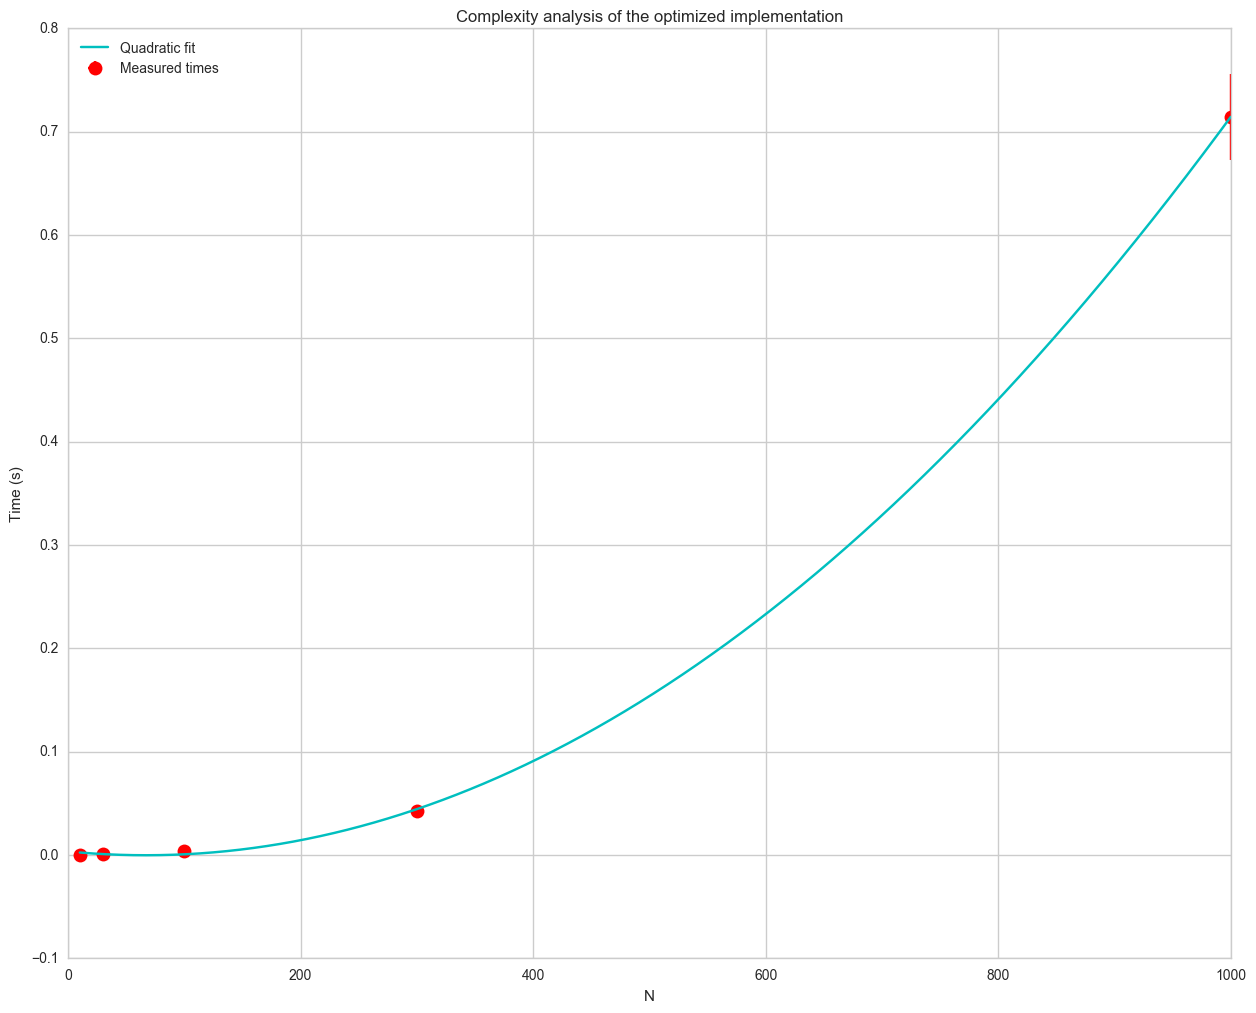

In [9]:
figure = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(N, time, xerr=0, yerr=errors ,  fmt='ro', ecolor='r' , markersize = 10 , label = "Measured times")
numbers = np.linspace(min(N) , max(N) , 10000)
y_fit = []
for i in range(len(numbers)):
    y_fit.append(quadratic(numbers[i] , *param))
plt.plot(numbers , y_fit, 'c-' , label = "Quadratic fit")
plt.ylabel("Time (s)")
plt.xlabel("N")
plt.title("Complexity analysis of the optimized implementation")
plt.legend(loc = 2)
plt.savefig("complexity_final.pdf")
plt.show(True)

In [21]:
#calculate speed up and propagate error
To = 54.202
err_o = 0.07
Topt = 36.913
err_opt = 0.067

S= To/Topt
err_s = math.sqrt((To/(Topt**2))**2 * err_opt**2 + 1/Topt**2 * err_o**2)

print(S)
print(err_s)

1.46837157641
0.00327100761851


In [14]:
math.sqrt(2)

1.4142135623730951

In [15]:
2**3


8